In [2]:
import numpy as np 
import pandas as pd 

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt


Stationarity: data is stationary when parameters of the data generating process do not change across time. every single sample in this time space is drawn from the same distribution with the same parameters

A normal dist is parametrised by mean and standard dev. If a sample of normal dist is stationary, then there is no trend in the mean and no trend in the standard deviation.

In [3]:
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)
    

# Series A

<ipython-input-13-185a7cd83284>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index = range(T))


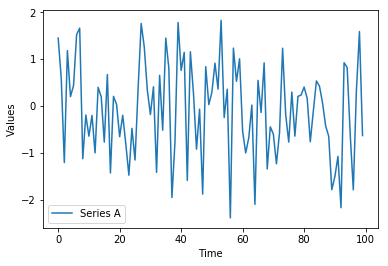

In [13]:
params = (0,1)
T = 100

A = pd.Series(index = range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_datapoint(params)

plt.plot(A)
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Series A'])

A stationary distribution essentially white noise

# Series B

<ipython-input-5-8f751f65afaf>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index = range(T))


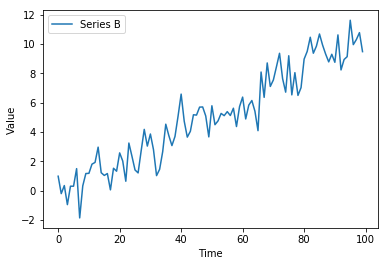

In [5]:
B = pd.Series(index = range(T))
B.name = 'B'

for t in range(T):
    params = (t*0.1, 1) #there is a trend in the mean, since it is time dependent
    B[t] = generate_datapoint(params)

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B'])



Series B is a linear time series. 

General statistics of a time series are meaningless: the mean of the time series is a moot point

# Testing for Stationarity

In [16]:
def check_for_stationarity(X, cutoff = 0.01):
    pvalue = adfuller(X)[1] #for AD Fuller, the alternative hypothesis is stationarity
    if pvalue < cutoff:
        print('pvalue ='+ str(pvalue) + ' ' + ' The series ' + X.name + ' is likely stationary.')
        return True
    else:
        print('pvalue ='+ str(pvalue) + ' The series ' + X.name + ' is likely non-stationary.')
        return False

In [17]:
check_for_stationarity(A)

pvalue =6.702724671292677e-17  The series A is likely stationary.


True

In [18]:
check_for_stationarity(B)

pvalue =0.8665172407759654 The series B is likely non-stationary.


False

but its easy to fool a hypothesis test

# Series C

<ipython-input-25-5ec2f0bf646b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  C = pd.Series(index = range(T))


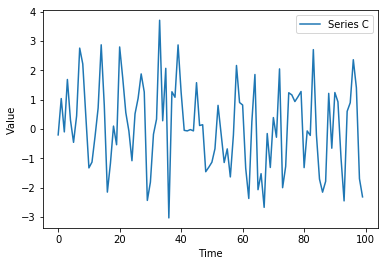

In [25]:
C = pd.Series(index = range(T))
C.name = 'C'

for t in range(T):
    params = (np.sin(t), 1)
    C[t] = generate_datapoint(params)

plt.plot(C)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series C'])


This graph looks very similar to the white noise graph in series A, but the first moment is time dependent

In [26]:
check_for_stationarity(C)

pvalue =0.0011241176545596725  The series C is likely stationary.


True

The above result shows that the hypothesis test result claims that C is a stationary distribution, which is just not true

# Order of Integration

If a series is stationary, it is also integration of order zero

# Inductively Building up Orders of Integration

if one takes an $I(0)$ series and cumulatively sums it (discrete integration), the new series will be $I(1)$. Notice how this is related to calculus concept of Integration

Now lets make an $I(1)$ series by taking the cumulative sum of A

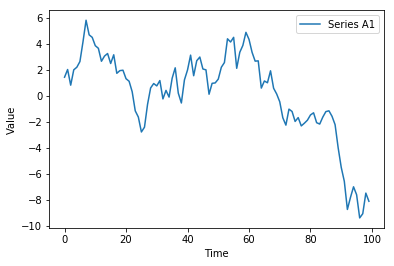

In [27]:
A1 = np.cumsum(A)

plt.plot(A1)

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A1'])

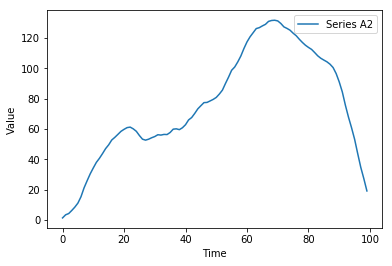

In [28]:
A2 = np.cumsum(A1)

plt.plot(A2)

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A2'])

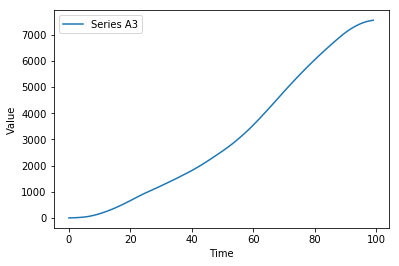

In [29]:
A3 = np.cumsum(A2)

plt.plot(A3)

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A3'])

a key assumption in finance is that returns are normally distributed: they are stationary

# Breaking down orders of Integration

Instead of taking orders of integration, we are doing the opposite: we take the first order difference (inverse of cumulative sum)

$$(1-L)X_t = X_t - X_{t-1} = \Delta X$$
$$(1-L)^d X_t$$

In this case, $L$ is the lag operator, sometimes also written as $B$ for backshift. $L$ fetches the second to last elements in the time series, and $L^d$ fetches the $k-th$ to last elements. So:

$$LX_t = X_{t-1}$$ 

and

$$(1-L)X_t = X_t - X_{t-1}$$

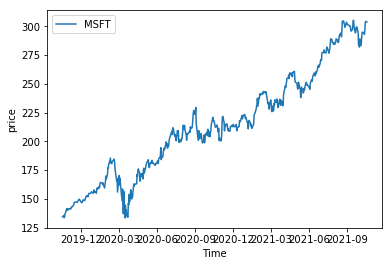

In [47]:
import yfinance as yf

prices = yf.Ticker('MSFT').history(period='2y')
closePrice = prices['Close']

plt.plot(closePrice)

plt.xlabel('Time')
plt.ylabel('price')
plt.legend(['MSFT'])


In [48]:
check_for_stationarity(closePrice)

pvalue =0.9135427340269322 The series Close is likely non-stationary.


False

pvalue =2.108739577645478e-09  The series MSFT Additive Returns is likely stationary.


/Users/sonakshirohra/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sonakshirohra/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


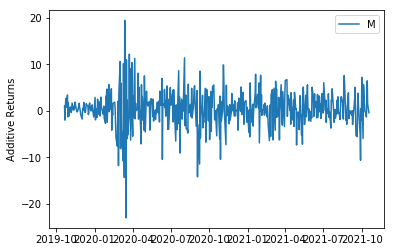

In [49]:
X1 = closePrice.diff()[1:]

X1.name = 'MSFT Additive Returns'

check_for_stationarity(X1)

plt.plot(X1.index, X1.values)
plt.ylabel('Additive Returns')
plt.legend('MSFT')


pvalue =2.627164217454311e-09  The series multiplicative returns is likely stationary.


/Users/sonakshirohra/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sonakshirohra/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


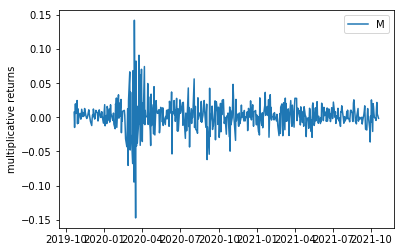

In [50]:
pct = closePrice.pct_change()[1:]
pct.name = 'multiplicative returns'

check_for_stationarity(pct)

plt.plot(pct.index, pct.values)
plt.ylabel('multiplicative returns')
plt.legend('MSFT')

do not naively assume that because a time series is stationary in the past it will continue to be stationary in the future. Tests for consistency and stationarity such as cross validation and out of sample testing are necessary. This is true of any statistical property. 
Returns may also go in and out of stationarity, depending on the timeframe and sampling frequency

the reason returns are used for modelling is because they are more stationary than prices

# Cointegration

For soe set of time series $(X_1, X_2, ..., X_k)$, if all series are $I(1)$, and some linear combination of them is $I(0)$, we say that the set of time series is cointegrated.

We are explaining the non stationarity of one time series with the non stationarity of some other time series.

In a stationary distribution, wherein you have the mean, you can check the spread between the current value and the mean, and place a bet on whether the price will revert to its mean or not.

This is not time bound, i.e does not give you a time metric on WHEN the price will revert. (Look into Hurst Exponent, Ornstein Uhlenbeck etc)


# Simulated Data Example

In [51]:
N = 100

K = np.random.normal(0,1,N)
K1 = np.cumsum(K)
K1 = pd.Series(K1)
K1.name = 'K1'

K2 = K1 + np.random.normal(0,1,N)
K2.name = 'K2'

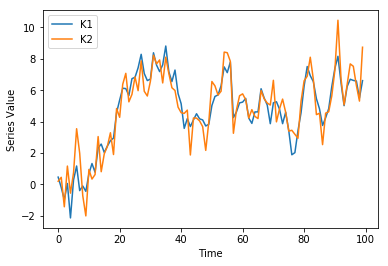

In [52]:
plt.plot(K1)
plt.plot(K2)
plt.xlabel('Time')
plt.ylabel('Series Value')

plt.legend([K1.name, K2.name])

Because $K_2$ is just an $I(1)$ series plus some stationary noise, it should also be $I(1)$.

In [53]:
M = K2.diff()[1:]
M.name = 'M'

check_for_stationarity(M)

pvalue =4.664027562507856e-12  The series M is likely stationary.


True

Now to show cointegration, we need to find some linear combination of $K_1$ and $K_2$, that is stationary. We can take $K_2 - K_1$ since by design, all that should be left is stationary white noise.

pvalue =0.001201389859535164  The series Z is likely stationary.


True

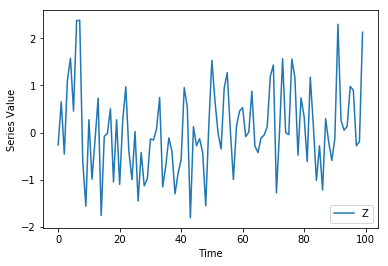

In [54]:
Z = K2 - K1
Z.name = 'Z'

plt.plot(Z)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['Z'])

check_for_stationarity(Z)

obviously, in our case the linear combination is by design and it won't be this pretty with real financial data.

In the case of real data, we use a linear regression to estimate these coefficients:

$$K_2 = \alpha + \beta K_1 + \epsilon$$

We can remove $K_2$'s dependency on $K_1$, leaving behind stationary noise.

$K_2 - \beta K_1 = \alpha + \epsilon$ should be stationary

# Real Data Example

In [64]:
prices = yf.download(['ABG.MC', 'FSLR'], start = '2014-01-01', end = '2015-01-01')
prices = prices['Close']

prices.head()

[*********************100%***********************]  2 of 2 completed


,ABG.MC,FSLR
Date,,
2013-12-31,2.420,54.639999
2014-01-02,2.373,57.439999
2014-01-03,2.431,56.740002
2014-01-06,2.525,51.259998
2014-01-07,2.568,52.490002


In [72]:
X1 = prices['ABG.MC']
X2 = prices['FSLR']
X1 = X1.fillna(method = 'ffill')
X2 = X2.fillna(method = 'ffill')

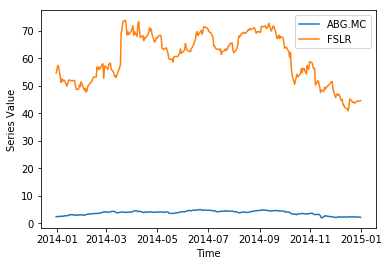

In [73]:
plt.plot(X1.index, X1.values)
plt.plot(X2.index, X2.values)

plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['ABG.MC', 'FSLR'])

use a linear regression to compute $\beta$

In [74]:
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

X1 = X1['ABG.MC']

results.params

const     23.391754
ABG.MC     9.853781
dtype: float64

pvalue =0.0011157066472111171  The series Z is likely stationary.


/Users/sonakshirohra/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sonakshirohra/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


True

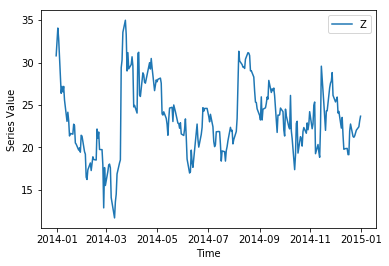

In [76]:
b = results.params['ABG.MC']

Z = X2 - b*X1 #buy one stock of FSLR and short b stocks of ABG.MC
Z.name = 'Z'

plt.plot(Z.index, Z.values)
plt.xlabel("Time")
plt.ylabel('Series Value')
plt.legend(Z.name)

check_for_stationarity(Z)

# Existing Tests

In [77]:
coint(X1, X2)

(-4.067455080281106,
 0.00574109551192503,
 array([-3.93939291, -3.35991506, -3.06092962]))